In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go

from tabulate import tabulate

In [2]:
# yahoo dat: https://finance.yahoo.com/quote/BAT-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAADnYT0Ox2AkJtC-32g4fK44BNgcuSAvxSXNnrD9cxRVSqxX97iqr_UVTfmMW1JZFBaMdb1wea4btFKJRlHraSJ96XnLZGu5A46wrw0CNB4Xvbh4AeT6RF7WlTxA4WG_LyaKNzIRnq_5x3JNIcZtc-AFE3Y49gKFA8Qb7nooaWHHk

df = pd.read_csv('BAT-USD.csv', usecols=['Date', 'Close'], index_col=['Date'])
df.head()

,Close
Date,
2020-12-22,0.217977
2020-12-23,0.192380
2020-12-24,0.218165
2020-12-25,0.214190
2020-12-26,0.213414


In [3]:
df.shape

(366, 1)

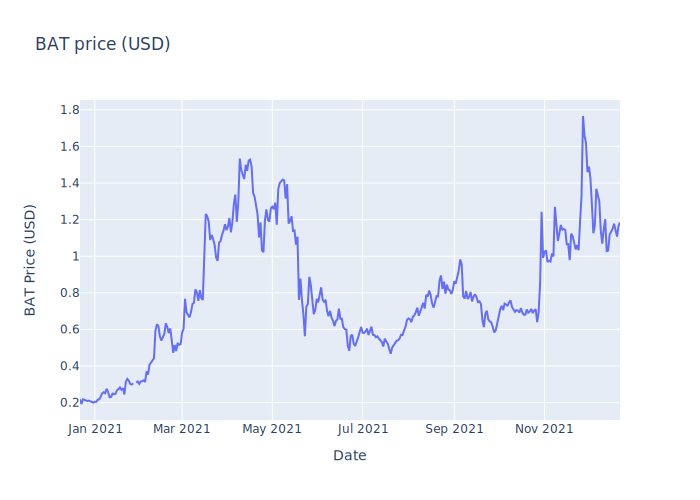

In [15]:
fig = px.line(df, y='Close', title='BAT price (USD)', labels={'Close': 'BAT Price (USD)'})
fig.show('svg')

# SMA — Simple Moving Average 

In [5]:
window1 = 9
small_sma = 'SMA' + str(window1)
df[small_sma] = df['Close'].rolling(window=window1, min_periods=1).mean()
df.tail(2)

,Close,SMA9
Date,,
2021-12-21,1.166475,1.11593
2021-12-22,1.184876,1.13336


In [6]:
window2 = 26
big_sma = 'SMA' + str(window2)
df[big_sma] = df['Close'].rolling(window=window2, min_periods=1).mean()
df.tail(2)

,Close,SMA9,SMA26
Date,,,
2021-12-21,1.166475,1.11593,1.266560
2021-12-22,1.184876,1.13336,1.261023


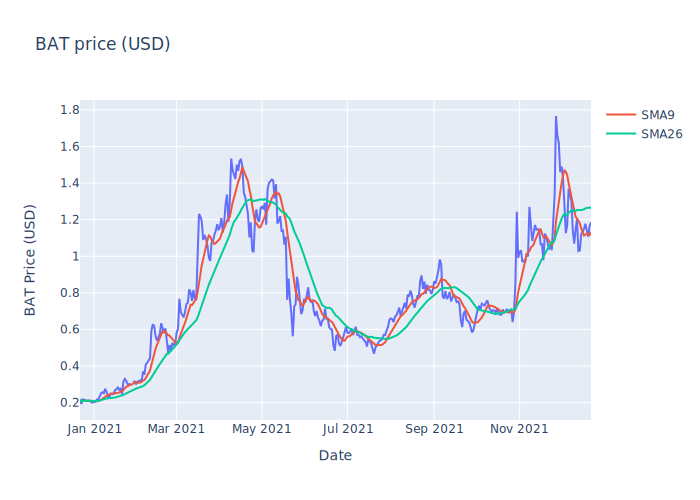

In [16]:
fig = px.line(df, y='Close', title='BAT price (USD)', labels={'Close': 'BAT Price (USD)'})
fig.add_scatter(x=df.index, y=df[small_sma], mode='lines', name=small_sma)
fig.add_scatter(x=df.index, y=df[big_sma], mode='lines', name=big_sma)
fig.show('svg')

In [8]:
df['SMA_Signal'] = 0.0
df['SMA_Signal'] = np.where(df[small_sma] > df[big_sma], 1.0, 0.0)

# day-to-day difference of the 'signal'
df['SMA_Position'] = df['SMA_Signal'].diff()
df.tail()

,Close,SMA9,SMA26,SMA_Signal,SMA_Position
Date,,,,,
2021-12-18,1.177470,1.117136,1.261721,0.0,0.0
2021-12-19,1.134094,1.124407,1.264521,0.0,0.0
2021-12-20,1.106973,1.119951,1.267371,0.0,0.0
2021-12-21,1.166475,1.115930,1.266560,0.0,0.0
2021-12-22,1.184876,1.133360,1.261023,0.0,0.0


Position: 1 = buy, -1 = sell

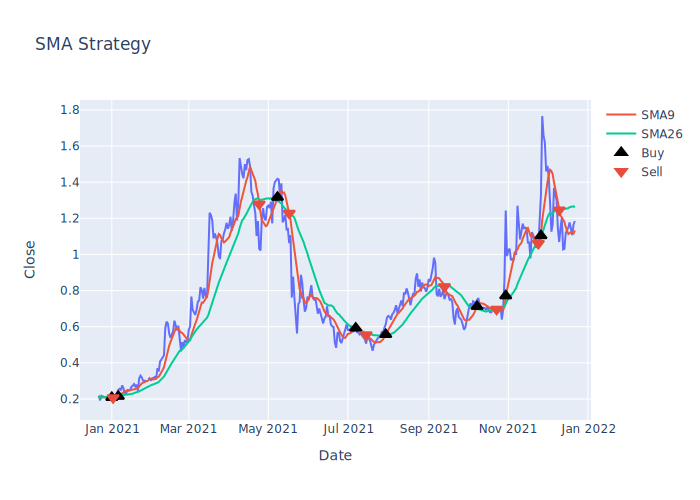

In [9]:
fig = px.line(df, y='Close', title='SMA Strategy', labels={'index': 'Date'})
fig.add_scatter(x=df.index, y=df[small_sma], mode='lines', name=small_sma)
fig.add_scatter(x=df.index, y=df[big_sma], mode='lines', name=big_sma)

buy_signal = df[df['SMA_Position'] == 1]
sell_signal = df[df['SMA_Position'] == -1]

fig.add_trace(go.Scatter(mode='markers', x=buy_signal.index, y=buy_signal[small_sma] ,marker_symbol='triangle-up',
                        marker_line_color='#000000', marker_color='#000000',
                        marker_line_width=2, marker_size=10, name='Buy'))

fig.add_trace(go.Scatter(mode='markers', x=sell_signal.index, y=sell_signal[small_sma], marker_symbol='triangle-down',
                        marker_line_color='#E74C3C', marker_color='#E74C3C',
                        marker_line_width=2, marker_size=10, name='Sell'))

fig.show('svg')

# EMA — Exponential Moving Average

In [10]:
small_ema = 'EMA' + str(window1)
big_ema = 'EMA' + str(window2)

df[small_ema] = df['Close'].ewm(span=window1, adjust=False).mean()
df[big_ema] = df['Close'].ewm(span=window2, adjust=False).mean()
df.head()

,Close,SMA9,SMA26,SMA_Signal,SMA_Position,EMA9,EMA26
Date,,,,,,,
2020-12-22,0.217977,0.217977,0.217977,0.0,NaN,0.217977,0.217977
2020-12-23,0.192380,0.205178,0.205178,0.0,0.0,0.212858,0.216081
2020-12-24,0.218165,0.209507,0.209507,0.0,0.0,0.213919,0.216235
2020-12-25,0.214190,0.210678,0.210678,0.0,0.0,0.213973,0.216084
2020-12-26,0.213414,0.211225,0.211225,0.0,0.0,0.213861,0.215886


In [11]:
df['EMA_Signal'] = 0.0
df['EMA_Signal'] = np.where(df[small_ema] > df[big_ema], 1.0, 0.0)
df['EMA_Position'] = df['EMA_Signal'].diff()

df.tail()

,Close,SMA9,SMA26,SMA_Signal,SMA_Position,EMA9,EMA26,EMA_Signal,EMA_Position
Date,,,,,,,,,
2021-12-18,1.177470,1.117136,1.261721,0.0,0.0,1.149774,1.182908,0.0,0.0
2021-12-19,1.134094,1.124407,1.264521,0.0,0.0,1.146638,1.179292,0.0,0.0
2021-12-20,1.106973,1.119951,1.267371,0.0,0.0,1.138705,1.173935,0.0,0.0
2021-12-21,1.166475,1.115930,1.266560,0.0,0.0,1.144259,1.173383,0.0,0.0
2021-12-22,1.184876,1.133360,1.261023,0.0,0.0,1.152382,1.174234,0.0,0.0


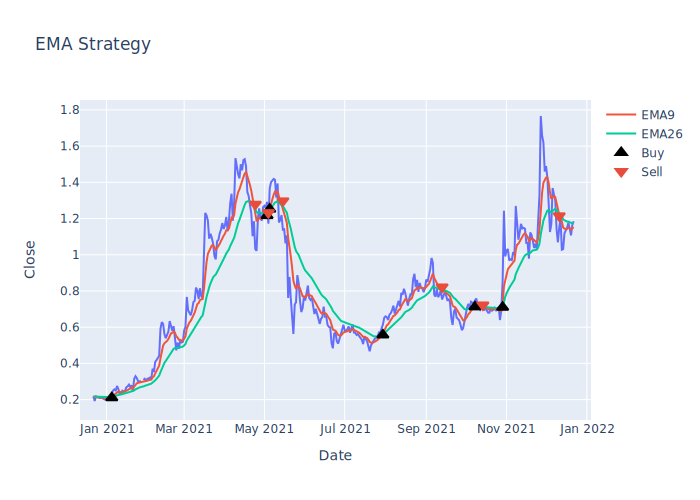

In [17]:
fig = px.line(df, y='Close', title='EMA Strategy', labels={'index': 'Date'})
fig.add_scatter(x=df.index, y=df[small_ema], mode='lines', name=small_ema)
fig.add_scatter(x=df.index, y=df[big_ema], mode='lines', name=big_ema)

buy_signal = df[df['EMA_Position'] == 1]
sell_signal = df[df['EMA_Position'] == -1]

fig.add_trace(go.Scatter(mode='markers', x=buy_signal.index, y=buy_signal[small_sma] ,marker_symbol='triangle-up',
                        marker_line_color='#000000', marker_color='#000000',
                        marker_line_width=2, marker_size=10, name='Buy'))

fig.add_trace(go.Scatter(mode='markers', x=sell_signal.index, y=sell_signal[small_sma], marker_symbol='triangle-down',
                        marker_line_color='#E74C3C', marker_color='#E74C3C',
                        marker_line_width=2, marker_size=10, name='Sell'))

fig.show('svg')

In [18]:
dft = df[(df['EMA_Position'] == 1) | (df['EMA_Position'] == -1)]
dft['EMA_Position'] = dft['EMA_Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
dft = dft.drop([small_sma, big_sma, 'SMA_Signal', 'SMA_Position', 'EMA_Signal'], axis=1)
print(tabulate(dft, headers = 'keys', tablefmt = 'psql'))

+------------+----------+----------+----------+----------------+
| Date       |    Close |     EMA9 |    EMA26 | EMA_Position   |
|------------+----------+----------+----------+----------------|
| 2021-01-05 | 0.231887 | 0.214568 | 0.213572 | Buy            |
| 2021-04-24 | 1.03205  | 1.23017  | 1.25247  | Sell           |
| 2021-05-03 | 1.29228  | 1.24289  | 1.23983  | Buy            |
| 2021-05-04 | 1.17185  | 1.22868  | 1.2348   | Sell           |
| 2021-05-05 | 1.36623  | 1.25619  | 1.24453  | Buy            |
| 2021-05-15 | 1.13846  | 1.24974  | 1.26718  | Sell           |
| 2021-07-30 | 0.613559 | 0.566179 | 0.559107 | Buy            |
| 2021-09-13 | 0.752936 | 0.802916 | 0.805935 | Sell           |
| 2021-10-08 | 0.747423 | 0.714558 | 0.711628 | Buy            |
| 2021-10-14 | 0.702637 | 0.710963 | 0.712154 | Sell           |
| 2021-10-29 | 0.853367 | 0.722642 | 0.710312 | Buy            |
| 2021-12-11 | 1.14708  | 1.22142  | 1.22561  | Sell           |
+------------+----------+